<font size="10" color="Blue"><center>Python<center></font>

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://imgs.xkcd.com/comics/internal_monologues.png")

In [ ]:
<font size="10">
    <center>Intro</center>

<IMG src="http://jupyter.org/assets/nav_logo.svg">
<IMG src="images/download.png">
</font>

<font size="10">
    <center>Notebooks: the win? </center>

<IMG src="http://jupyter.org/assets/nav_logo.svg">
<IMG src="images/download.png">
</font>

In [ ]:
import ipaddress

def string_to_ip(ipstring):
    return ipaddress.ip_network(ipstring)

In [ ]:
import pandas
from zipfile import ZipFile
with ZipFile('/Users/c266770/Downloads/GeoLite2-City-CSV_20181113.zip') as zip:
    df_maxmind = pandas.read_csv(zip.open('GeoLite2-City-CSV_20181113/GeoLite2-City-Blocks-IPv4.csv'))
    
df_maxmind = df_maxmind.reset_index()
df_maxmind['network'] = df_maxmind['network'].apply(string_to_ip)


In [ ]:
df_maxmind.head(5)

In [ ]:
import os
import csv

events = []
directory = '/Users/c266770/Desktop/ids/'
for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith('.csv') and file.startswith('cisco'):
            with open(directory+'/'+file) as csvfile:
                idscsv = csv.reader(csvfile)
                next(idscsv)
                for row in idscsv:
                    events.append((row[3],row[6]))

In [ ]:
from collections import Counter
bad_guys = []

for idstuple in events:
    if idstuple[0].startswith('40.'):
        if idstuple[1].startswith('40.'):
            continue
        else:
            bad_guys.append(idstuple[1])
    else:
        bad_guys.append(idstuple[0])

worst_guys = {}
for key,value in dict(Counter(bad_guys)).items():
    worst_guys[key] = {}
    worst_guys[key]['count'] = value

In [ ]:
for bad_guy in worst_guys:
    print(bad_guy)
    df_temp = df_maxmind[df_maxmind.network.apply(lambda x: ipaddress.ip_address(bad_guy) in x)][["longitude","latitude"]]
    df_temp = df_temp.reset_index()
    worst_guys[bad_guy]["longitude"] = df_temp.at[0,"longitude"]
    worst_guys[bad_guy]["latitude"] = df_temp.at[0,"longitude"]

In [ ]:
#https://dev.maxmind.com/geoip/geoip2/geolite2/
#This product includes GeoLite2 data created by MaxMind, available from
#<a href="http://www.maxmind.com">http://www.maxmind.com</a>
import geoip2.database
reader = geoip2.database.Reader('/Users/c266770/Downloads/GeoLite2-City_20181113/GeoLite2-City.mmdb')

In [ ]:
for bad_guy in worst_guys:
    #print(bad_guy)
    response = reader.city(bad_guy)
    worst_guys[bad_guy]["longitude"] = round(response.location.longitude,3)
    worst_guys[bad_guy]["latitude"] = round(response.location.latitude,3)

In [ ]:
location = []

for bad_guy,values in worst_guys.items():
    location.append((values['latitude'],values['longitude']))
    
location = set(location)

In [ ]:
#https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html
import gmaps
import gmaps.datasets
import pickle

with open('/Users/c266770/Desktop/pickles/api.pkl', 'rb') as f:
    api = pickle.load(f)

gmaps.configure(api['googleMaps'])

In [ ]:
fig = gmaps.figure(center=(0,0),zoom_level=1.75, map_type='HYBRID')
heatmap = gmaps.heatmap_layer(locations=location)
fig.add_layer(heatmap)

In [ ]:
fig

divider

In [1]:
import os
import csv
import pandas
import matplotlib.pyplot as plt

In [2]:
directory = '/Users/c266770/Desktop/reports/av'
events = []

for root,dirs,files in os.walk(directory):
    for file in files:
        if file.endswith('.csv') and file.startswith('av_daily'):
            date = file.split('_')[2].split('.')[0].split('-')[0:3]
            date = "-".join(date)
            with open(directory+'/'+file) as csvfile:
                devicescsv = csv.reader(csvfile)
                for row in devicescsv:
                    if len(row[0]) ==32:
                        row.append(date)
                        events.append(row)

In [3]:
labels = ['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10']
df_avReports = pandas.DataFrame.from_records(events, columns=labels)

df_mcafeeAv = df_avReports[df_avReports.col2 == 'mcafee_av'][['col1','col4','col5','col8']]
df_mcafeeAv = df_mcafeeAv.rename(index=str, columns={'col1':'md5','col4':'src_host','col5':'av_sig','col8':'date'})
df_mcafeeAv['date'] = pandas.to_datetime(df_mcafeeAv['date'])
#df_mcafeeAv.head(5)

df_mcafeeHip = df_avReports[df_avReports.col2 == 'mcafee_hip'][['col1','col5','col9','col10']]
df_mcafeeHip = df_mcafeeHip.rename(index=str, columns={'col1':'md5','col5':'src_host','col9':'av_sig','col10':'date'})
df_mcafeeHip['date'] = pandas.to_datetime(df_mcafeeHip['date'])
#df_mcafeeHip.head(5)

df_cylance = df_avReports[df_avReports.col2 == 'cylance_av'][['col1','col5','col3','col7']]
df_cylance.col1 = df_cylance.col1.map(lambda x: x.lower())
df_cylance = df_cylance.rename(index=str, columns={'col1':'md5','col5':'src_host','col3':'av_sig','col7':'date'})
df_cylance['date'] = pandas.to_datetime(df_cylance['date'])
#df_cylance.head(5)

dfs = [df_mcafeeAv, df_mcafeeHip, df_cylance]
df_avcombo = pandas.concat(dfs)
df_avcombo.head(5)

,md5,src_host,av_sig,date
0,ae5cf1e0939132faa64c9b3c8df78de3,UBBBC5CG54738XR,GenericRXFQ-QJ!AE5CF1E09391,2018-06-14
1,ae5cf1e0939132faa64c9b3c8df78de3,UBBBC5CG54738XR,GenericRXFQ-QJ!AE5CF1E09391,2018-06-14
2,d34f58d7ae3e089409767d348cec3490,UBBBC5CG5172P1V,Artemis!D34F58D7AE3E,2018-06-14
3,68fd8d8a57adefc6a6276309a88d9daf,TRBBCCNU410DDTW,Artemis!68FD8D8A57AD,2018-06-14
4,d78bde0fe37c1c696c31b256516ecccf,IT2SR8CN7360HZS,Artemis!D78BDE0FE37C,2018-06-14


In [4]:
y = df_avcombo.groupby('date').count()['md5'].map(lambda x: float(x))
df_y = pandas.DataFrame(y)
df_y = df_y.asfreq('D')
start = len(df_y) -10
end = len(df_y) + 15

In [5]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df_y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

/Users/c266770/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


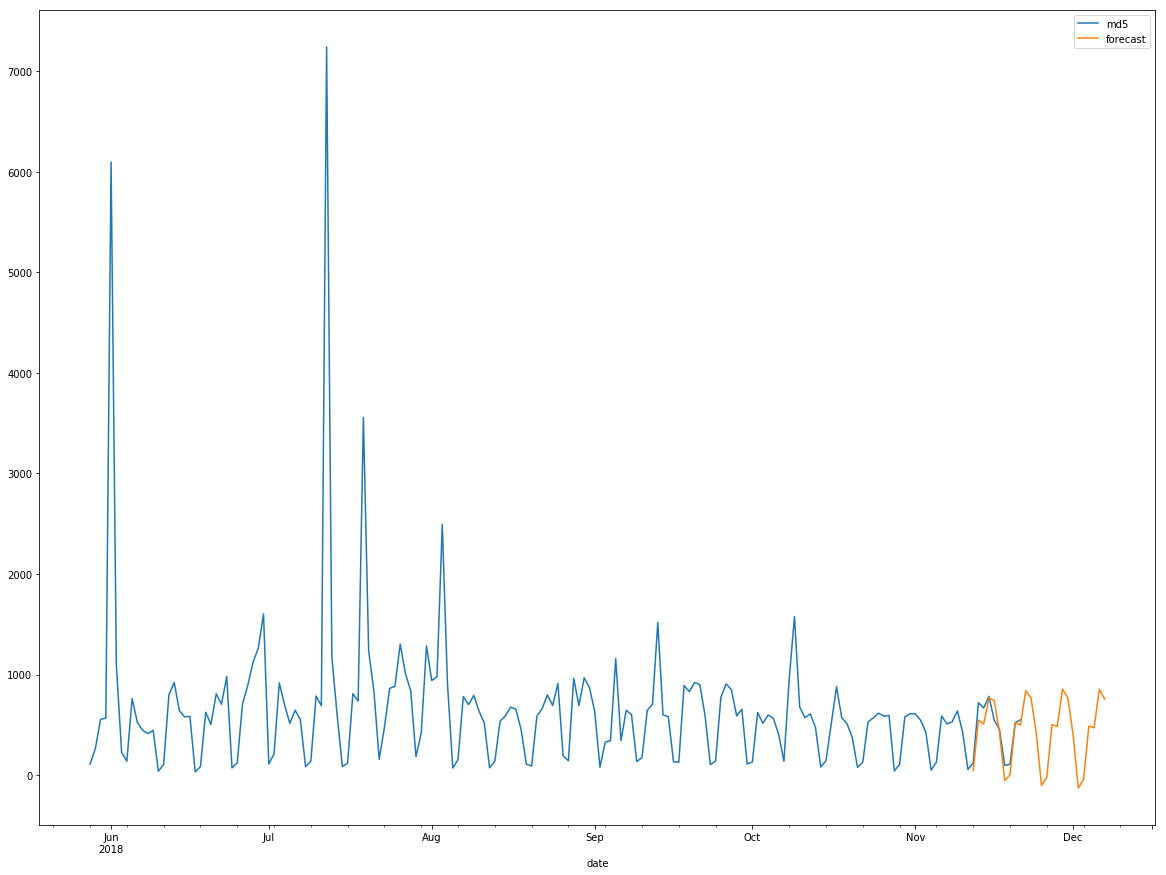

In [6]:
pred_results = results.predict(start=start, end=end, dynamic=True)

ax = df_y.plot(label='observed', figsize=(20, 15))
pred_results.plot(ax=ax, label='forecast')
plt.legend()

In [7]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
import math

output_notebook()

Loading BokehJS ...

In [9]:
plot = figure(x_axis_type='datetime', plot_width = 800)
source = ColumnDataSource(df_y)

df_pred = pred_results.to_frame().reset_index().rename(columns={'index':'date',0:"md5"}).set_index('date')
source2 = ColumnDataSource(df_pred)

plot.line('date', 'md5', source=source)
plot.line('date', 'md5', source = source2, line_color = 'red')
plot.xaxis.major_label_orientation = math.pi/2

show(plot)


division


In [10]:
%run /Users/c266770/Desktop/notebooks/proxy-load.ipynb

In [70]:
import requests

def vt_call(hashes):
    if type(hashes) == list:
        if len(hashes) < 5:
            resource = ','.join(hashes)
                
        elif len(hashes) > 5:
            resource = [hashes[i:i + 4] for i in range(0, len(hashes), 4)]
        else:
            return 'empty list?'
    elif type(hashes) == str and len(hashes.split(',')) == 1:
        resource = hashes
    elif type(hashes) == str and len(hashes.split(',')) < 4:
        resource = hashes
    elif type(hashes) == str and len(hashes.split(',')) > 4:
        hashes = hashes.split(',')
        resource = [hashes[i:i + 4] for i in range(0, len(hashes), 4)]
    else:
        return ''
    
    headers = {"Accept-Encoding": "gzip, deflate",
               "User-Agent" : "python"
              }
    
    if type(resource != list):
        params = {'apikey': api['vt'], 'resource': resource}
        response = requests.get('https://www.virustotal.com/vtapi/v2/file/report',
                                params = params, 
                                headers = headers,
                                proxies = proxies)
        return response.json()
    else:
        response = []
        for hash_list in resource:
            params = {'apikey': api['vt'], 'resource': ','.join(hash_list)}
            vt_request = requests.get('https://www.virustotal.com/vtapi/v2/file/report',
                                      params = params,
                                      headers = headers,
                                      proxies = proxies)
            response = response + vt_request.json()
            
        return response

In [64]:
test = ['866fcd320412a9fdd78aefc31372c74e',
        '29c1a72fa565f339065d1f6c8a58de11',
        '38acd35c1b04167823c83bbd8a12352c',
        '28b78a1ab9f541a0a85cb853eb556fe8',
        'ac8c1fa592b1551fd57072c371b7c748']

In [71]:
vt_call(test)

[]